In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [2]:
dirname=os.getcwd()
path_parent = os.path.dirname(os.getcwd())
print(path_parent)

C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project


In [3]:
te_df = pd.read_csv(os.path.join(path_parent, "Data\\Clean_Data\\tes.csv"))

,Unnamed: 0.1,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,Rush_Att,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec
0,0,229,223,Ernie Conwell,STL,28,TE,16,1,2,...,0.0,0.0,0,0,0,0.0,0.0,0,0,0
1,1,276,269,Rickey Dudley,OAK,28,TE,16,16,1,...,0.0,0.0,0,0,0,0.0,0.0,0,0,0
2,2,318,309,Mike Sellers,WAS,25,TE,15,6,1,...,0.0,0.0,0,0,0,0.0,0.0,0,0,0
3,3,821,159,Ernie Conwell,STL,29,TE,16,14,7,...,0.0,0.0,0,0,0,0.0,0.0,0,0,0
4,4,923,258,Tony Gonzalez*+,KAN,25,TE,16,16,1,...,118.7,0.0,0,0,0,40.0,40.0,0,0,0


In [4]:
te_df['probowl']=0

In [5]:
for index, row in te_df.iterrows():
    if "*" in row['Player']:
        row['probowl'] = 1
        te_df.loc[index, 'probowl'] = 1

## Tight End Random Forest (All Variables) [1]

In [6]:
te_df_features = te_df.iloc[:,8:]
te_df_features = te_df_features.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
te_df_features.head()

,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,Rec_Tgt,...,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec,probowl
0,1,2,23,0,1,17,11.5,1.4,0,9,...,0.0,0,0,0,0.0,0.0,0,0,0,0
1,16,1,-7,0,0,-7,-7.0,-0.4,1,49,...,0.0,0,0,0,0.0,0.0,0,0,0,0
2,6,1,2,0,1,2,2.0,0.1,0,11,...,0.0,0,0,0,0.0,0.0,0,0,0,0
3,14,7,28,1,3,13,4.0,1.8,2,52,...,0.0,0,0,0,0.0,0.0,0,0,0,0
4,16,1,9,0,0,9,9.0,0.6,0,118,...,0.0,0,0,0,40.0,40.0,0,0,0,1


In [7]:
te_df_features.dtypes

GS              int64
Rush_Att        int64
Rush_Yds        int64
Rush_TD         int64
Rush_1D         int64
Rush_Lng        int64
Rush_Y/A      float64
Rush_Y/G      float64
Rush_Fmb        int64
Rec_Tgt         int64
Rec_Rec         int64
Rec_Ctch%      object
Rec_Yds         int64
Rec_Y/R       float64
Rec_TD          int64
Rec_1D          int64
Rec_Lng         int64
Rec_Y/Tgt     float64
Rec_R/G       float64
Rec_Y/G       float64
Rec_Fmb         int64
Pass_Cmp        int64
Pass_Att        int64
Pass_Cmp%       int64
Pass_Yds        int64
Pass_TD         int64
Pass_TD%        int64
Pass_Int        int64
Pass_Int%       int64
Pass_1D         int64
Pass_Lng        int64
Pass_Y/A      float64
Pass_AY/A     float64
Pass_Y/C      float64
Pass_Y/G      float64
Pass_Rate     float64
Pass_QBR      float64
Pass_Sk         int64
Pass_Yds.1      int64
Pass_Sk%        int64
Pass_NY/A     float64
Pass_ANY/A    float64
Pass_4QC        int64
Pass_GWD        int64
QBrec           int64
probowl   

In [8]:
#Change all % columns to float, then classifier will run.
te_df_features['Rec_Ctch%'] = te_df_features['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [9]:
train1, test1 = train_test_split(te_df_features, test_size=0.333, stratify=te_df_features['probowl'])

In [10]:
train_y1 = train1['probowl']
train_x1=train1.drop(columns=['probowl'])
test_y1=test1['probowl']
test_x1=test1.drop(columns=['probowl'])

In [13]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [165, 170,180],
    'max_features': [11,12,13],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [11,12,13,14],
    'n_estimators': [40,60,80]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [12]:
grid_search1.fit(train_x1, train_y1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [180],
                         'max_features': [13], 'min_samples_leaf': [2],
                         'min_samples_split': [14], 'n_estimators': [40]},
             verbose=2)

In [13]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 180,
 'max_features': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 40}

In [14]:
rf_mod1 = grid_search1.best_estimator_
print(rf_mod1)
rfc_pred1 = rf_mod1.predict(test_x1)

RandomForestClassifier(max_depth=180, max_features=13, min_samples_leaf=2,
                       min_samples_split=14, n_estimators=40)


In [15]:
print(confusion_matrix(test_y1,rfc_pred1))

[[625   6]
 [ 13  25]]


In [16]:
print(classification_report(test_y1, rfc_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       631
           1       0.81      0.66      0.72        38

    accuracy                           0.97       669
   macro avg       0.89      0.82      0.85       669
weighted avg       0.97      0.97      0.97       669



In [17]:
rfc_prob1 = rf_mod1.predict_proba(test_x1)

In [18]:
test_rfc_y1_2 = test_y1.to_numpy()
roc_auc_score(test_rfc_y1_2, rfc_prob1[:,1])

0.9785219784802736

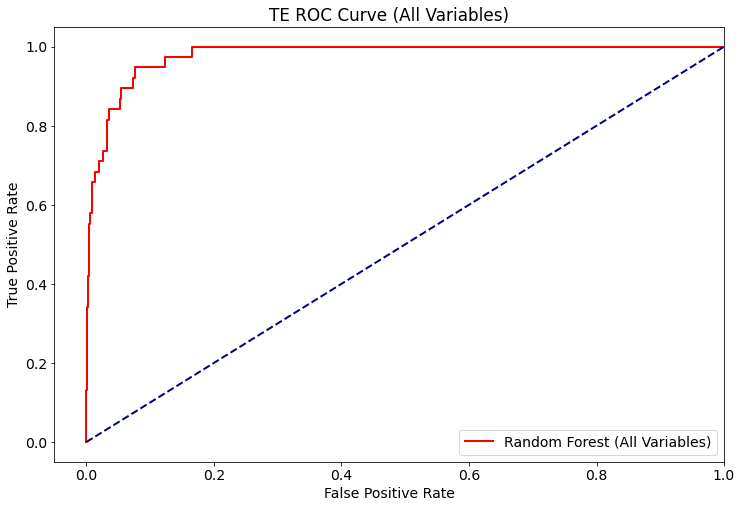

In [20]:
fpr_rfc_1, tpr_rfc_1, _ = roc_curve(test_rfc_y1_2, rfc_prob1[:,1])
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='red', lw=2, label="Random Forest (All Variables)")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TE ROC Curve (All Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\TEs\ROC_all.jpg'), bbox_inches='tight')

## Tight End Random Forest (Only Receiving Variables) [2]

In [21]:
te_df_features2 = te_df.iloc[:,8:]
te_df_features2 = te_df_features2.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
te_df_features2 = te_df_features2[te_df_features2.columns.drop(list(te_df.filter(regex='Pass')))]
te_df_features2 = te_df_features2[te_df_features2.columns.drop(list(te_df.filter(regex='Rush')))]
print(te_df_features2.columns)
te_df_features2.head()

Index(['GS', 'Rec_Tgt', 'Rec_Rec', 'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD',
       'Rec_1D', 'Rec_Lng', 'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb',
       'QBrec', 'probowl'],
      dtype='object')


,GS,Rec_Tgt,Rec_Rec,Rec_Ctch%,Rec_Yds,Rec_Y/R,Rec_TD,Rec_1D,Rec_Lng,Rec_Y/Tgt,Rec_R/G,Rec_Y/G,Rec_Fmb,QBrec,probowl
0,1,9,5,55.6%,40,8.0,0,3,17,4.4,0.3,2.5,0,0,0
1,16,49,29,59.2%,350,12.1,4,18,30,7.1,1.8,21.9,1,0,0
2,6,11,8,72.7%,78,9.8,2,6,24,7.1,0.5,5.2,0,0,0
3,14,52,38,73.1%,431,11.3,4,19,47,8.3,2.4,26.9,2,0,0
4,16,118,73,61.9%,917,12.6,6,49,36,7.8,4.6,57.3,0,0,1


In [22]:
#Change all % columns to float, then classifier will run.
te_df_features2['Rec_Ctch%'] = te_df_features2['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [23]:
train2, test2 = train_test_split(te_df_features2, test_size=0.333, stratify=te_df_features2['probowl'])

In [24]:
train_y2 = train2['probowl']
train_x2=train2.drop(columns=['probowl'])
test_y2=test2['probowl']
test_x2=test2.drop(columns=['probowl'])

In [29]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110],
    'max_features': [1,2],
    'min_samples_leaf': [9,11,13],
    'min_samples_split': [10,11,12],
    'n_estimators': [100,110,120]
}
rf = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [26]:
# Fit the grid search to the data
grid_search2.fit(train_x2, train_y2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [110],
                         'max_features': [1], 'min_samples_leaf': [9],
                         'min_samples_split': [12], 'n_estimators': [120]},
             verbose=2)

In [27]:
grid_search2.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 1,
 'min_samples_leaf': 9,
 'min_samples_split': 12,
 'n_estimators': 120}

In [28]:
rf_mod2 = grid_search2.best_estimator_
print(rf_mod2)
rfc_pred2 = rf_mod2.predict(test_x2)

RandomForestClassifier(max_depth=110, max_features=1, min_samples_leaf=9,
                       min_samples_split=12, n_estimators=120)


In [29]:
print(confusion_matrix(test_y2,rfc_pred2))

[[628   3]
 [ 19  19]]


In [30]:
print(classification_report(test_y2, rfc_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       631
           1       0.86      0.50      0.63        38

    accuracy                           0.97       669
   macro avg       0.92      0.75      0.81       669
weighted avg       0.96      0.97      0.96       669



In [31]:
rfc_prob2 = rf_mod2.predict_proba(test_x2)

In [32]:
test_rfc_y2_2 = test_y2.to_numpy()
roc_auc_score(test_rfc_y2_2, rfc_prob2[:,1])

0.970139294353157

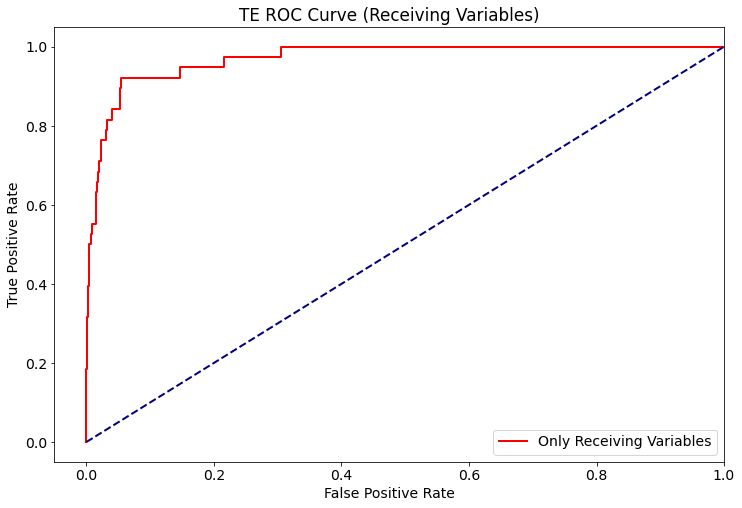

In [33]:
fpr_rfc_2, tpr_rfc_2, _ = roc_curve(test_rfc_y2_2, rfc_prob2[:,1])
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="Only Receiving Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TE ROC Curve (Receiving Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\TEs\ROC_Receiving.jpg'), bbox_inches='tight')

## Visualize feature importance for all variables

In [34]:
print(type(rf_mod1.feature_importances_))
print(len(rf_mod1.feature_importances_))

<class 'numpy.ndarray'>
45


In [35]:
feat = te_df_features.columns.to_list()
arr = np.array(feat)
print(len(arr))
arr

46


array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec', 'probowl'], dtype='<U10')

In [36]:
#Drop probowl column 
arr = arr[0:45]
print(len(arr))

45


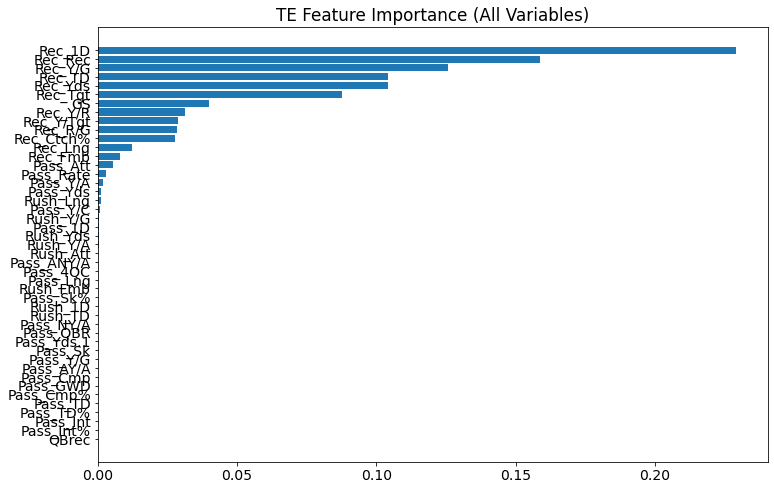

In [37]:
sorted_idx = rf_mod1.feature_importances_.argsort()
plt.barh(arr[sorted_idx], rf_mod1.feature_importances_[sorted_idx])
plt.title('TE Feature Importance (All Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\TEs\Importance_All.jpg'), bbox_inches='tight')

## Visualize feature importance for only receiving variables

In [38]:
print(type(rf_mod2.feature_importances_))
print(len(rf_mod2.feature_importances_))
rf_mod2.feature_importances_

<class 'numpy.ndarray'>
14


array([0.06863683, 0.10289543, 0.12172153, 0.02258127, 0.09017984,
       0.03029164, 0.10633823, 0.10059919, 0.0268201 , 0.02152146,
       0.14062136, 0.15544907, 0.01234404, 0.        ])

In [39]:
feat = te_df_features2.columns.to_list()
arr2 = np.array(feat)

In [40]:
arr

array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec'], dtype='<U10')

In [41]:
#Drop probowl column
arr2=arr2[0:14]
print(len(arr2))

14


Sort the feature importance

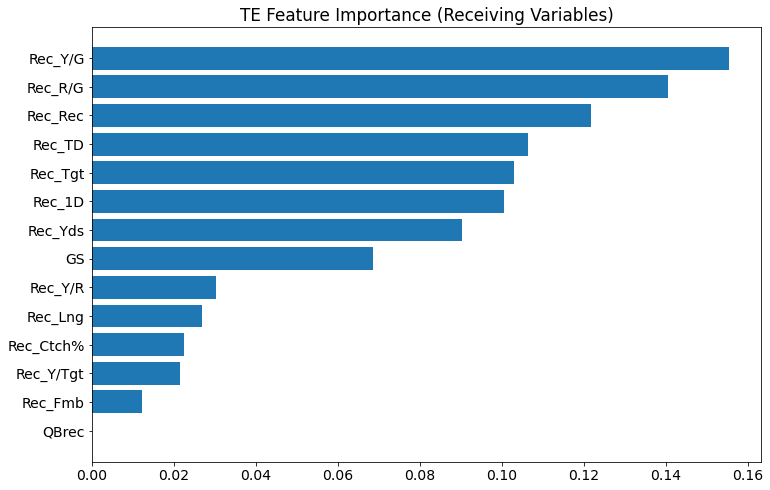

In [42]:
sorted_idx = rf_mod2.feature_importances_.argsort()
plt.barh(arr2[sorted_idx], rf_mod2.feature_importances_[sorted_idx])
plt.title('TE Feature Importance (Receiving Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\TEs\Importance_Receiving.jpg'), bbox_inches='tight')

## RF Model with only the top 8 variables [3]

In [43]:
top_te_features = te_df[['Rec_Yds','Rec_Y/G','Rec_1D','Rec_Rec','Rec_Tgt','Rec_R/G','Rec_TD','GS','probowl']]
top_te_features.head()

,Rec_Yds,Rec_Y/G,Rec_1D,Rec_Rec,Rec_Tgt,Rec_R/G,Rec_TD,GS,probowl
0,40,2.5,3,5,9,0.3,0,1,0
1,350,21.9,18,29,49,1.8,4,16,0
2,78,5.2,6,8,11,0.5,2,6,0
3,431,26.9,19,38,52,2.4,4,14,0
4,917,57.3,49,73,118,4.6,6,16,1


In [44]:
train3, test3 = train_test_split(top_te_features, test_size=0.333, stratify=top_te_features['probowl'])
train_y3 = train3['probowl']
train_x3=train3.drop(columns=['probowl'])
test_y3=test3['probowl']
test_x3=test3.drop(columns=['probowl'])

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110,130],
    'max_features': [2,3,4],
    'min_samples_leaf': [9,11,13],
    'min_samples_split': [10,11,12],
    'n_estimators': [100,110,120]
}
rf = RandomForestClassifier()
grid_search3 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [47]:
# Fit the grid search to the data
grid_search3.fit(train_x3, train_y3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [130],
                         'max_features': [3], 'min_samples_leaf': [9],
                         'min_samples_split': [11], 'n_estimators': [100]},
             verbose=2)

In [48]:
grid_search3.best_params_

{'bootstrap': True,
 'max_depth': 130,
 'max_features': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 11,
 'n_estimators': 100}

In [49]:
rf_mod3 = grid_search3.best_estimator_
print(rf_mod3)
rfc_pred3 = rf_mod3.predict(test_x3)

RandomForestClassifier(max_depth=130, max_features=3, min_samples_leaf=9,
                       min_samples_split=11)


In [50]:
print(confusion_matrix(test_y3,rfc_pred3))

[[620  11]
 [ 16  22]]


In [51]:
print(classification_report(test_y3, rfc_pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       631
           1       0.67      0.58      0.62        38

    accuracy                           0.96       669
   macro avg       0.82      0.78      0.80       669
weighted avg       0.96      0.96      0.96       669



In [52]:
rfc_prob3 = rf_mod3.predict_proba(test_x3)

In [53]:
test_rfc_y3_2 = test_y3.to_numpy()
roc_auc_score(test_rfc_y3_2, rfc_prob3[:,1])

0.971265326549337

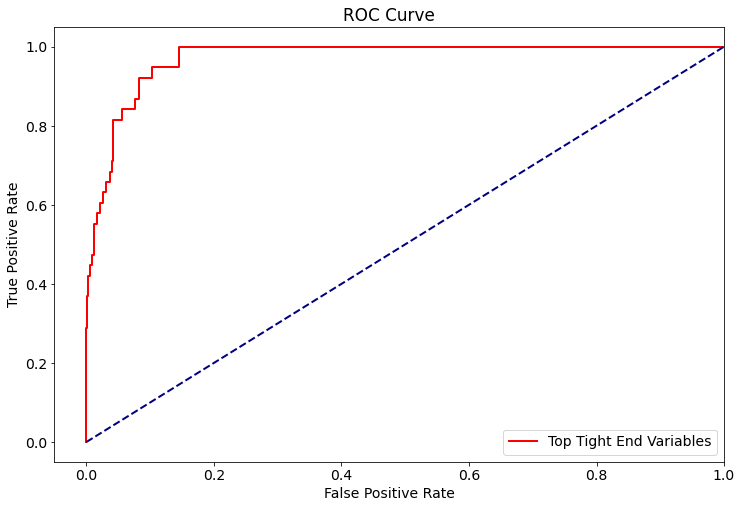

In [55]:
fpr_rfc_3, tpr_rfc_3, _ = roc_curve(test_rfc_y3_2, rfc_prob3[:,1])
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='red', lw=2, label="Top Tight End Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\TEs\ROC_Top8_Receiving.jpg'), bbox_inches='tight')

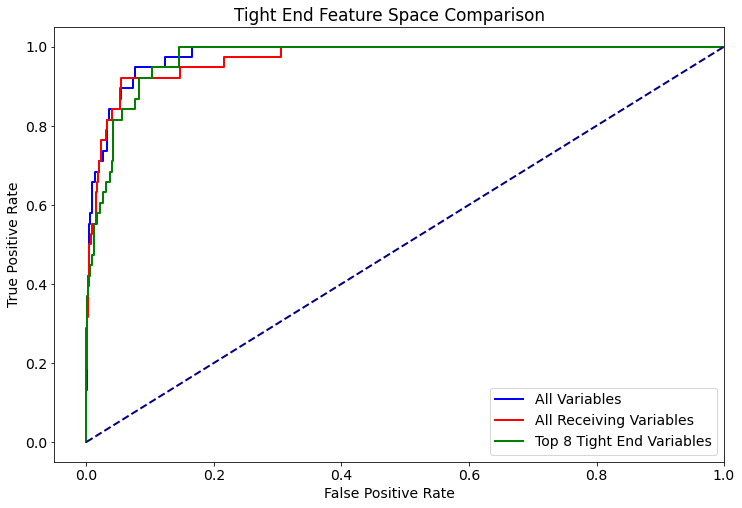

In [57]:
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='blue', lw=2, label="All Variables")
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="All Receiving Variables")
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='green', lw=2, label="Top 8 Tight End Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tight End Feature Space Comparison')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\TEs\TE_ROC_Comparison.jpg'), bbox_inches='tight')

In [58]:
print('ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y1,rfc_pred1))
print("\n Classification Report: ")
print(classification_report(test_y1, rfc_pred1))

ALL VARIABLES: 

Confusion Matrix:
[[625   6]
 [ 13  25]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       631
           1       0.81      0.66      0.72        38

    accuracy                           0.97       669
   macro avg       0.89      0.82      0.85       669
weighted avg       0.97      0.97      0.97       669



 ONLY RECEIVING VARIABLES: 

Confusion Matrix:
[[628   3]
 [ 19  19]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       631
           1       0.86      0.50      0.63        38

    accuracy                           0.97       669
   macro avg       0.92      0.75      0.81       669
weighted avg       0.96      0.97      0.96       669



 TOP 6 RECEIVING VARIABLES: 

Confusion Matrix:
[[620  11]
 [ 16  22]]

 Classification Report: 
              precision    recall  f1-score   support

          

In [59]:
print('ONLY RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

ONLY RECEIVING VARIABLES: 

Confusion Matrix:
[[628   3]
 [ 19  19]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       631
           1       0.86      0.50      0.63        38

    accuracy                           0.97       669
   macro avg       0.92      0.75      0.81       669
weighted avg       0.96      0.97      0.96       669



In [61]:
print('TOP 8 RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y3,rfc_pred3))
print("\n Classification Report: ")
print(classification_report(test_y3, rfc_pred3))

TOP 6 RECEIVING VARIABLES: 

Confusion Matrix:
[[625   6]
 [ 18  20]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       631
           1       0.77      0.53      0.62        38

    accuracy                           0.96       669
   macro avg       0.87      0.76      0.80       669
weighted avg       0.96      0.96      0.96       669



**All 3 random forest models result in an F1-Score >= 0.98 for identifying non-Pro-Bowl players**

Using only receiving variables results in the highest F1-Score for identifying Pro-Bowl Tight Ends (0.73).

Using all 46 variables results in the next highest F1-Score for identifying Pro-Bowl Tight Ends (0.62).

The lowest Pro-Bowl F1-score (0.56) is the model that only used the 8 most important Tight End features.